___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

## colab Package Update

In [1]:
# !pip install -Uq matplotlib scikit-plot tensorflow-addons scikeras[tensorflow] 

⚠️ **restart**

## import

In [2]:
import tensorflow as tf

print("Tensorflow version \t\t:" + tf.__version__)

# print("Available devices:")
# for i, device in enumerate(tf.config.list_logical_devices()):
#     print("%d) %s" % (i, device))

print("Num physical_GPUs Available\t:", len(tf.config.list_physical_devices('GPU')))
print("Num physical_CPUs Available\t:", len(tf.config.list_physical_devices('CPU')))
print()
print("Num logical_GPUs Available\t:", len(tf.config.list_logical_devices('GPU')))
print("Num logical_CPUs Available\t:", len(tf.config.list_logical_devices('CPU')))

Tensorflow version 		:2.11.0
Num physical_GPUs Available	: 1
Num physical_CPUs Available	: 1

Num logical_GPUs Available	: 1
Num logical_CPUs Available	: 1


In [3]:
import tensorflow as tf
# Select 'TPU', 'GPU', 'CPU'.
try:
    resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(resolver)
    tf.tpu.experimental.initialize_tpu_system(resolver)
    # strategy = tf.distribute.TPUStrategy(resolver)
    strategy = tf.distribute.experimental.TPUStrategy(resolver)
    
    print('TPU Device:', resolver.master(), len(tf.config.list_logical_devices('TPU')))
except ValueError:
    # If there's a GPU avaiable, to use the GPU,
    # otherwise, using the CPU instead.
    if tf.config.list_logical_devices('GPU'):        
        gpus = tf.config.list_logical_devices('GPU')
        strategy = tf.distribute.MirroredStrategy(gpus)   
        # strategy = tf.distribute.MirroredStrategy(["GPU:0", "GPU:1"])
          
        print('We will use the GPU Device:', gpus)    
    else:  
        # Use the Default Strategy
        strategy = tf.distribute.get_strategy()
        print('We will use the CPU Device because no GPU, TPU available.')
        
print('Number of replicas:', strategy.num_replicas_in_sync)
# tf.config.set_soft_device_placement(True)
# tf.debugging.set_log_device_placement(True)

We will use the GPU Device: [LogicalDevice(name='/device:GPU:0', device_type='GPU')]
Number of replicas: 1


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import skew, kurtosis

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Environment settings: 
# pd.set_option('display.float_format', lambda x: f'{x:.3f}')
# pd.set_option('display.float_format', lambda x: '%.4f'%x)
# pd.options.display.float_format = '{:.4f}'.format
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', 100)

In [5]:
random_state = seed = 101

In [6]:
# import gdown
# # same as the above, but with the file ID
# id = "1Ln96-m6v5H4GHZbdUlHoejmtT1l1LPou" # id: ...csv
# output = 'Churn_Modelling.zip' # download colab
# gdown.download(id=id, output=output, quiet=False)

In [7]:
# from google.colab import files
# uploaded = files.upload()

In [8]:
df_origin = pd.read_csv("./Churn_Modelling.zip")
df = df_origin.copy()
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.duplicated().sum()

0

In [11]:
(df.isna().mean()*100)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [12]:
df.describe(include='O').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [13]:
df.describe().T.style.background_gradient(cmap='PiYG_r', axis=1)

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000000,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
CustomerId,10000.000000,15690940.569400,71936.186123,15565701.000000,15628528.250000,15690738.000000,15753233.750000,15815690.000000
CreditScore,10000.000000,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Age,10000.000000,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,10000.000000,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,10000.000000,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
NumOfProducts,10000.000000,1.530200,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
HasCrCard,10000.000000,0.705500,0.455840,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,10000.000000,0.515100,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,10000.000000,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000


In [14]:
# skewness and kurtosis
pd.concat([
    df.skew(axis=0, skipna=True), 
    df.kurtosis(axis=0, skipna=True)], 
    axis=1, keys=['skew', 'kurtosis'
]).T

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
skew,0.0,0.001149,-0.071607,1.011320,0.010991,-0.141109,0.745568,-0.901812,-0.060437,0.002085,1.471611
kurtosis,-1.2,-1.196113,-0.425726,1.395347,-1.165225,-1.489412,0.582981,-1.186973,-1.996747,-1.181518,0.165671


In [15]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

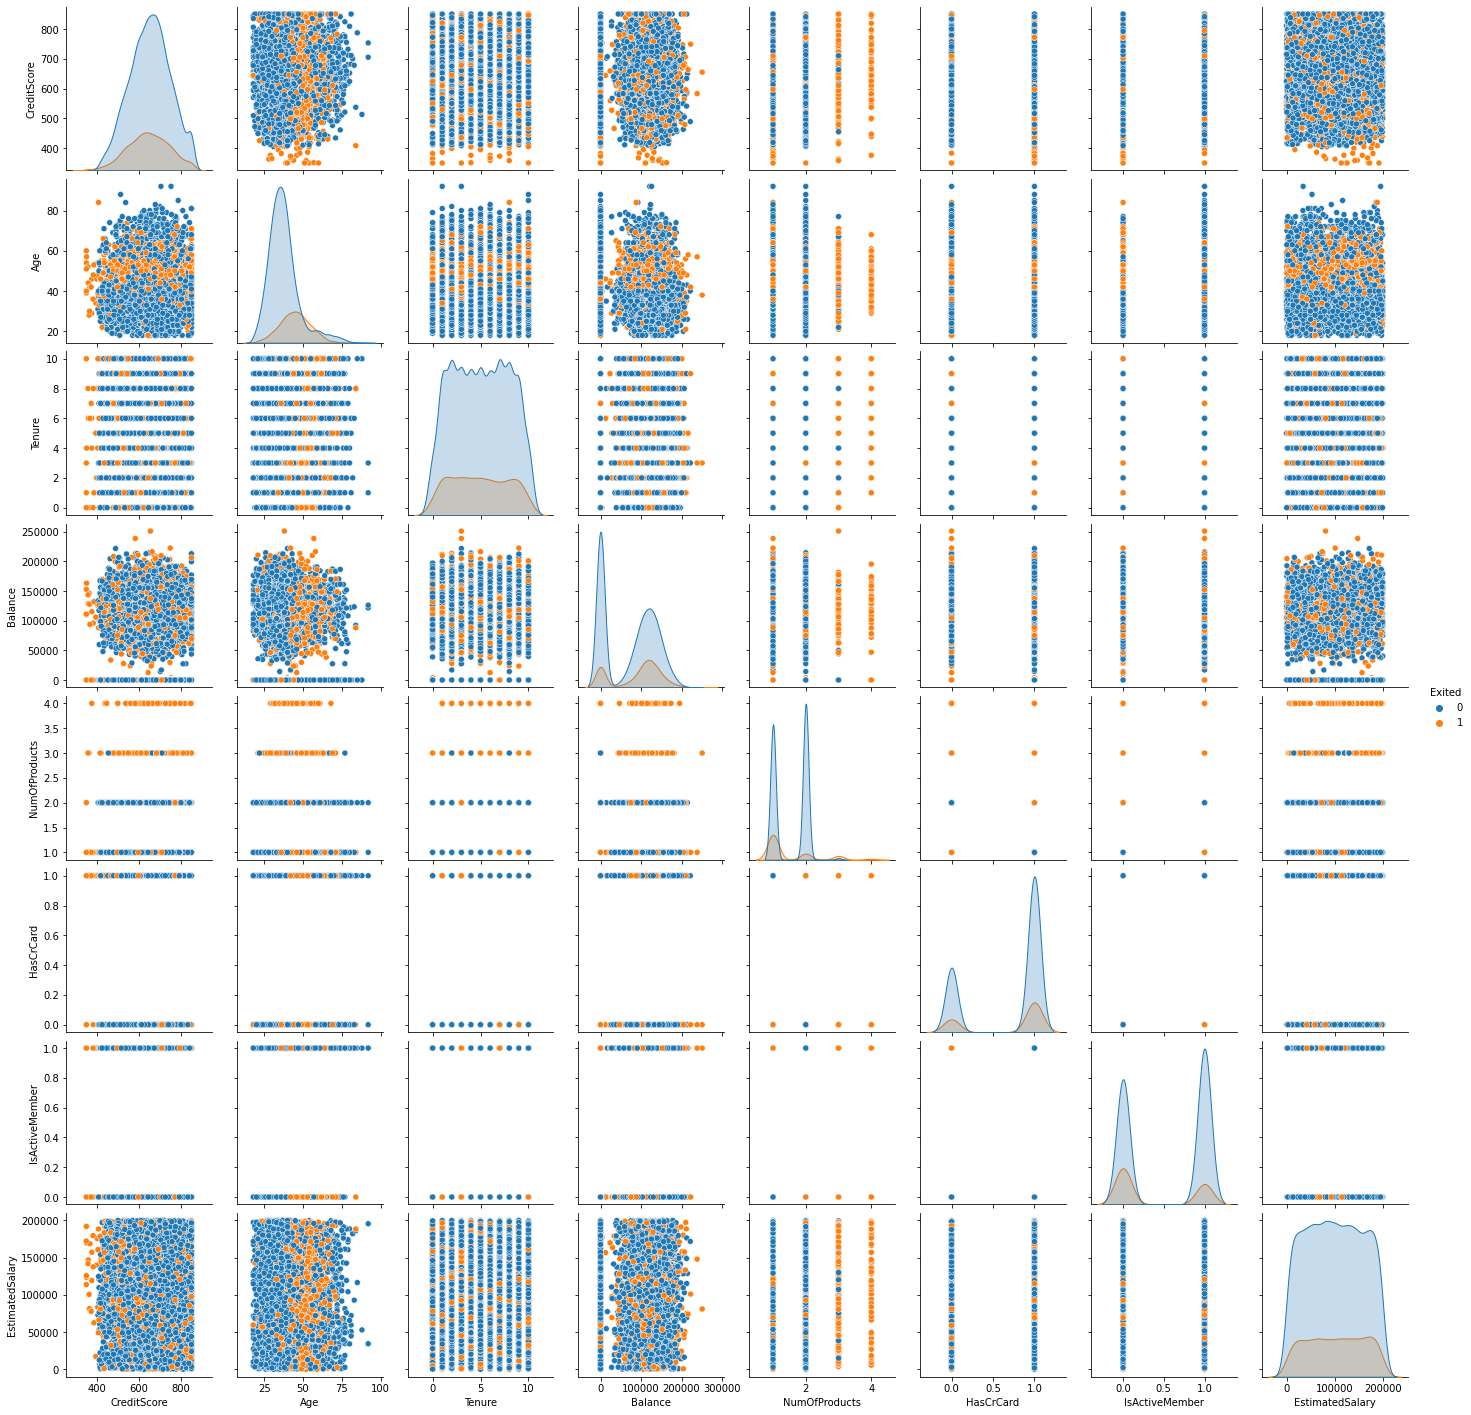

In [16]:
sns.pairplot(df, hue= "Exited")

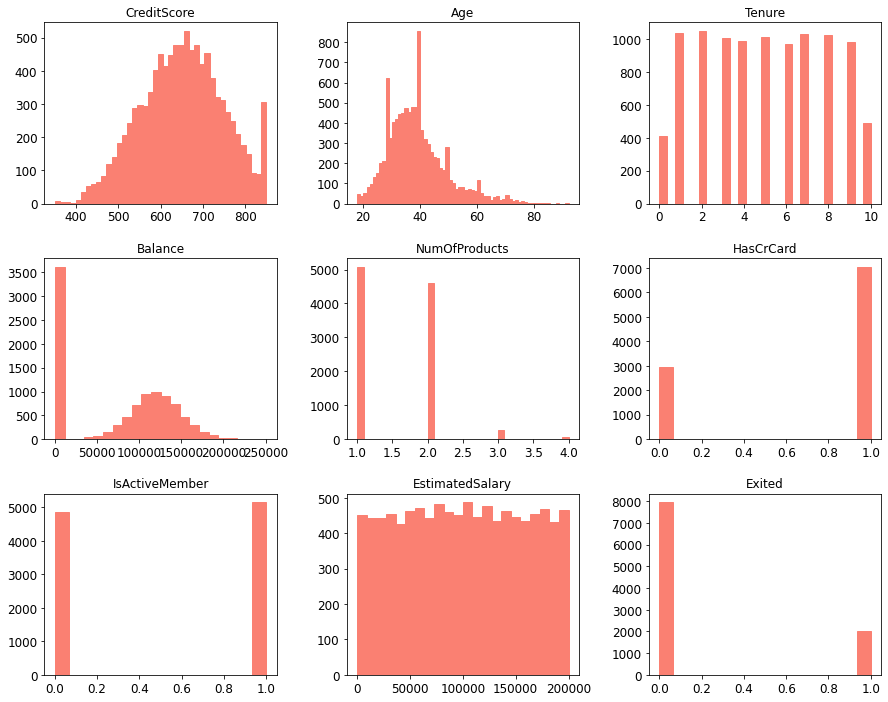

In [17]:
df.hist(
    xlabelsize=12, ylabelsize=12,
    color="salmon", edgecolor="salmon", 
    figsize=(15, 12), bins="auto", 
    grid=0
);

In [18]:
# multiolinarity
df.corr()[(abs(df.corr())>= 0.9) & (abs(df.corr()) < 1)].any().any()

False

<AxesSubplot: >

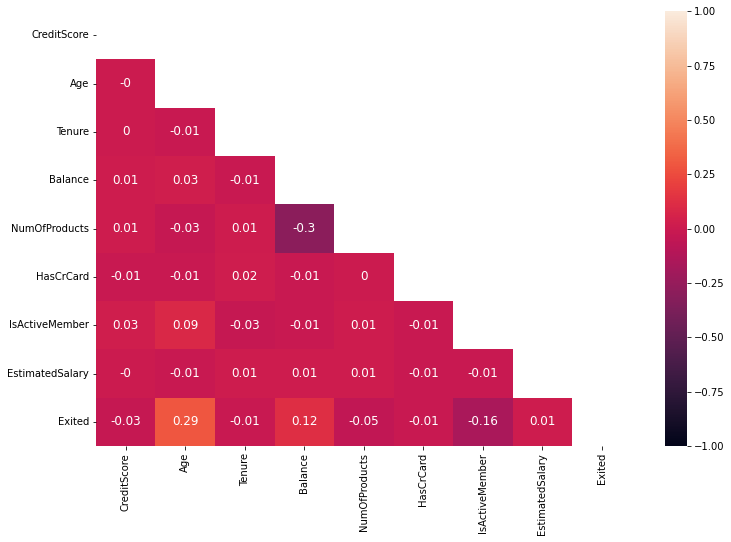

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(
    df.corr().round(2), 
    mask=np.triu(np.ones_like(df.corr(), dtype=bool)), 
    annot=True, vmin=-1, vmax=1,
    annot_kws={'fontsize':12}
)

<AxesSubplot: >

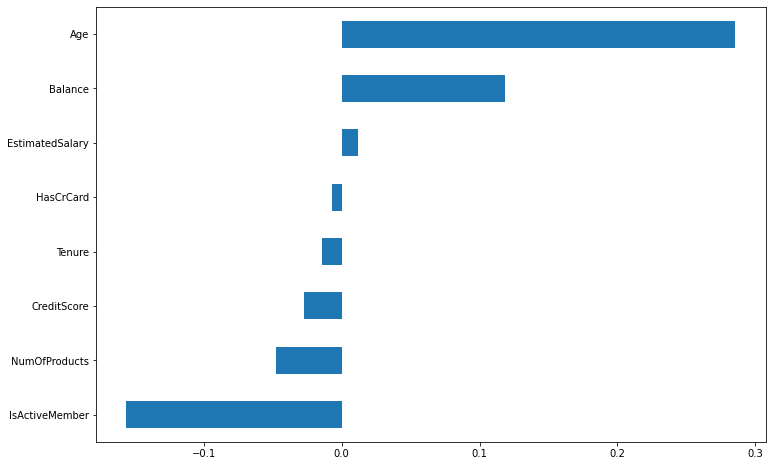

In [20]:
plt.figure(figsize=(12,8))
df.corr()["Exited"].sort_values(ascending=True)[:-1].plot(kind="barh")

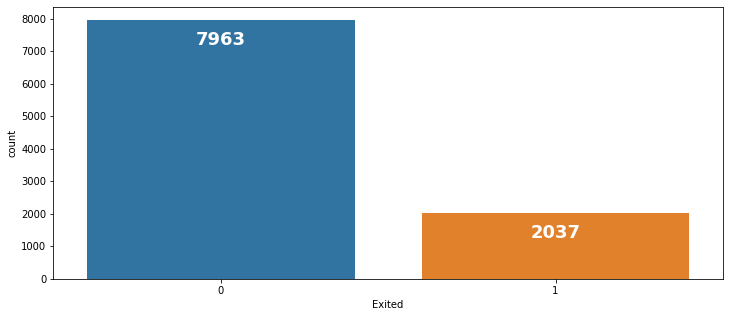

In [21]:
plt.figure(figsize=(12, 5))

g = sns.countplot(x=df["Exited"])
for c in g.containers:
  g.bar_label(c, padding=-29, fontsize=18, color='w', weight='bold');

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


# Preprocessing of Data
- Train | Test Split, Scalling

In [23]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=random_state)

X_train.shape, X_test.shape

((9000, 10), (1000, 10))

In [25]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

cat = X_train.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)

In [26]:
X_train_enc = column_trans.fit_transform(X_train)
X_test_enc = column_trans.transform(X_test)

X_train_enc.shape, X_test_enc.shape

((9000, 13), (1000, 13))

# Modelling & Model Performance

In [27]:
# !pip install tensorflow -Uq
import tensorflow as tf
# !pip install tensorflow-addons -Uq
import tensorflow_addons as tfa

from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import  SCORERS, classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
from sklearn.metrics import precision_recall_curve, average_precision_score

# !pip install scikeras[tensorflow] -Uq
# from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [28]:
# !pip install scikit-plot -Uq
import scikitplot as skplt

## Eval Metric Artificial Neural Network

In [177]:
def eval_metric(model, X_train, y_train, X_test, y_test, pipe = True):
    from sklearn.metrics import confusion_matrix, classification_report
    if pipe:
        y_pred_test  = model[-1].predict(model[:-1].transform(X_test)) >= 0.5
        y_pred_train = model[-1].predict(model[:-1].transform(X_train)) >= 0.5
    else:
        y_pred_test = model.predict(X_test) >= 0.5 # model.predict_classes(X_test) for tf 2.5.0
        y_pred_train = model.predict(X_train) >= 0.5
      
    print('TEST')    
    print(confusion_matrix(y_test, y_pred_test))
    print(classification_report(y_test, y_pred_test))
    print("-------------------------------------------------------")
    print('TRAIN')
    print(confusion_matrix(y_train, y_pred_train))
    print(classification_report(y_train, y_pred_train))

In [30]:
def plot_history(history, pipe=True):
    # Plot training results
    if pipe:
        H = history[-1].history.history
    else:
        H = history.history
    
    fig = plt.figure(figsize = (18, 7))

    plt.subplot(121)
    plt.plot(H['loss'], label = 'loss')
    plt.plot(H['val_loss'], label = 'val_loss')
    plt.grid()
    plt.legend()

    plt.subplot(122)
    plt.plot(H['recall'], label = 'recall')
    plt.plot(H['val_recall'], label = 'val_recall')
    plt.grid()
    plt.legend()

In [31]:
def plot_metrics(history, metrics_names, pipe=True):
    colors  = plt.rcParams['axes.prop_cycle'].by_key()['color']
    if pipe:
        history = history[-1].history
    else:
        history = history

    fig = plt.figure(figsize = (16, 8))

    for n, metric in enumerate(metrics_names):
        name = str(metric).replace("_"," ").capitalize()
        plt.subplot(3, 2, n+1)
        plt.plot(history.epoch, history.history[metric], 
                 color='xkcd:dodger blue', label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                 color='salmon', ls="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name, fontsize=12)
        plt.legend()
        plt.tight_layout(pad=0.3)
        if metric == 'loss':
            plt.ylim(top=plt.ylim()[1])
        else: # plt.ylim(plt.gca().get_ylim())
            plt.ylim(bottom=plt.ylim()[0])

## without class_weigth

### Create The Model

In [32]:
print("Model Defined Shape: ", X_train_enc.shape[1])                  # Input Layer Shape
print("Model Defined Unit : ", X_train_enc.shape[1]*1.5, " -> ", 32)  # Input Layer Units

# way-1
def build_classifier_model(
        input_dim: int = X_train_enc.shape[1],
        units:int      = 32,
) -> tf.keras.models.Model:    
    import tensorflow as tf    
    
    model = Sequential()
    model.add(Dense(units = units, activation = 'relu', input_shape=(input_dim, ) )) # input_dim = input_dim
    model.add(Dense(units = 16, activation = 'relu'))
    model.add(Dense(units = 8, activation = 'relu'))
    model.add(Dense(units = 1, activation = 'sigmoid'))
    
    model.compile(optimizer = "adam", 
                  loss = 'binary_crossentropy', 
                  metrics = ['accuracy', 'Recall'], 
                  # weighted_metrics=['Recall']
                  )
    return model

Model Defined Shape:  13
Model Defined Unit :  19.5  ->  32


In [33]:
print("Model Defined Shape: ", X_train_enc.shape[1])                  # Input Layer Shape
print("Model Defined Unit : ", X_train_enc.shape[1]*1.5, " -> ", 32)  # Input Layer Units

# way-2
def build_classifier_model_ann(
        input_dim: int = X_train_enc.shape[1],
        units:int      = 32,
) -> tf.keras.models.Model:
    import tensorflow as tf  
    
    inputs = tf.keras.layers.Input(shape=(input_dim, ) )
    x = tf.keras.layers.Dense(units, activation='relu')(inputs)
    x = tf.keras.layers.Dense(16, activation=tf.nn.relu)(x)
    x = tf.keras.layers.Dense(8, activation=tf.nn.relu)(x)   
    outputs  = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="classifier_model") 

    precision_at_recall = tf.keras.metrics.PrecisionAtRecall(recall=0.8)

    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), 
                  loss = tf.keras.losses.BinaryCrossentropy(), 
                  metrics = ['accuracy', tf.keras.metrics.Recall()], 
                  # weighted_metrics = [tf.keras.metrics.Recall()] 
                  )
    return model

Model Defined Shape:  13
Model Defined Unit :  19.5  ->  32


In [34]:
tf.keras.backend.clear_session()

tf.random.set_seed(seed)
np.random.seed(seed)

model = build_classifier_model()
display(model.summary())

pipe_ann1 = Pipeline([
    ("transform", column_trans),
    ("ann", model)
])
pipe_ann1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


None

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Geography', 'Gender'])])),
                ('ann',
                 <keras.engine.sequential.Sequential object at 0x7f1900367c10>)])

In [35]:
%%time
history = pipe_ann1.fit(X = X_train, y = y_train, ann__validation_split = 0.1, #validation_data = val_ds,
                    ann__batch_size = 64, ann__epochs = 1000, ann__verbose = 0)

CPU times: user 9min 19s, sys: 43.8 s, total: 10min 3s
Wall time: 8min 23s


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [36]:
# history_df = pd.DataFrame(model.history.history)
history_df = pd.DataFrame(history[-1].history.history)
history_df.index += 1
history_df.tail()

,loss,accuracy,recall,val_loss,val_accuracy,val_recall
996,0.251041,0.895185,0.640587,0.415433,0.833333,0.543147
997,0.249921,0.898272,0.649144,0.409931,0.838889,0.588832
998,0.249571,0.897901,0.647310,0.413444,0.838889,0.553299
999,0.247217,0.900617,0.650978,0.412490,0.834444,0.568528
1000,0.249814,0.898889,0.646699,0.413547,0.836667,0.497462


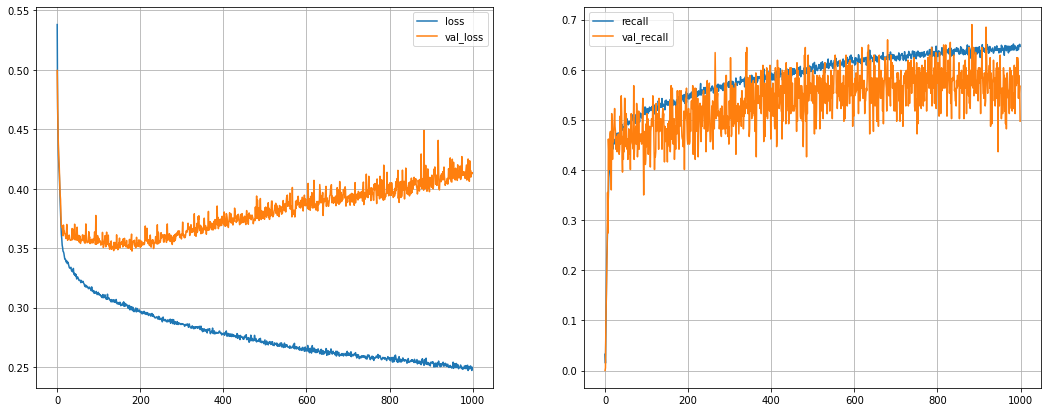

In [37]:
# Plot training results
plot_history(history)

In [38]:
pipe_ann1[-1].metrics_names

['loss', 'accuracy', 'recall']

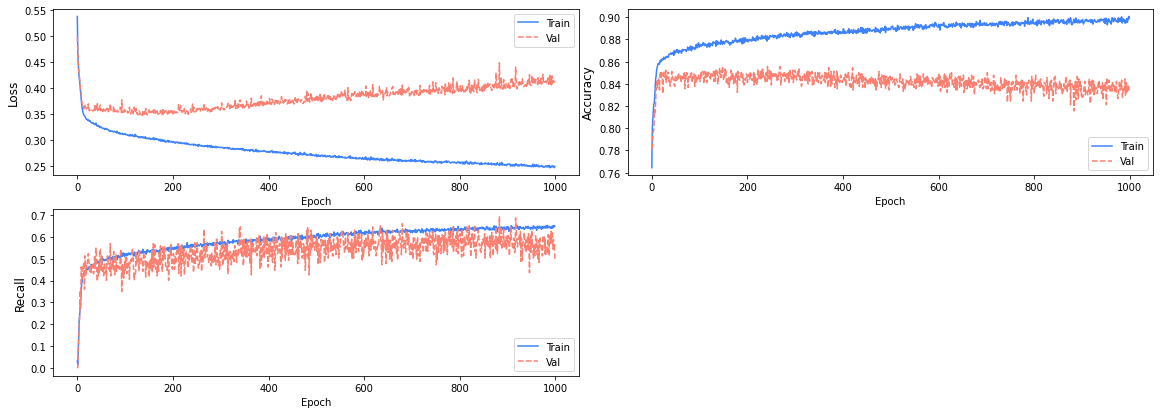

In [39]:
plot_metrics(history, history[-1].metrics_names)

In [40]:
pipe_ann1[-1].evaluate(
    pipe_ann1[:-1].transform(X_test), y_test, 
    return_dict=True, verbose=0)

{'loss': 0.4772937595844269,
 'accuracy': 0.8360000252723694,
 'recall': 0.3970588147640228}

In [178]:
eval_metric(pipe_ann1, X_train, y_train, X_test, y_test)

282/282 [==============================] - 0s 2ms/step
TEST
[[755  41]
 [123  81]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       796
           1       0.66      0.40      0.50       204

    accuracy                           0.84      1000
   macro avg       0.76      0.67      0.70      1000
weighted avg       0.82      0.84      0.82      1000

-------------------------------------------------------
TRAIN
[[6980  187]
 [ 760 1073]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      7167
           1       0.85      0.59      0.69      1833

    accuracy                           0.89      9000
   macro avg       0.88      0.78      0.82      9000
weighted avg       0.89      0.89      0.89      9000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [42]:
from sklearn.utils import class_weight
sample_weight = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
sample_weight

array([0.62787777, 0.62787777, 0.62787777, ..., 2.45499182, 0.62787777,
       2.45499182])

In [43]:
from sklearn.utils import class_weight

class_weights = dict(
    zip(np.unique(y_train),
        class_weight.compute_class_weight(
            class_weight = 'balanced',
            classes = np.unique(y_train), 
            y = y_train)
))
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

### Create The Model

In [44]:
tf.keras.backend.clear_session()

tf.random.set_seed(seed)
np.random.seed(seed)

model = build_classifier_model_ann()
display(model.summary())

pipe_ann2 = Pipeline([
    ("transform", column_trans),
    ("ann", model)
])
pipe_ann2

Model: "classifier_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


None

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Geography', 'Gender'])])),
                ('ann',
                 <keras.engine.functional.Functional object at 0x7f18ffecfb20>)])

In [45]:
%%time
history = pipe_ann2.fit(X = X_train, y = y_train, ann__validation_split = 0.1, #validation_data = val_ds,
                    ann__batch_size = 64, ann__epochs = 1000, ann__verbose = 0, ann__class_weight=class_weights)

CPU times: user 9min 44s, sys: 48.4 s, total: 10min 33s
Wall time: 7min 47s


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [46]:
history_df = pd.DataFrame(history[-1].history.history)
history_df.index += 1
history_df.tail()

,loss,accuracy,recall,val_loss,val_accuracy,val_recall
996,0.368050,0.833827,0.813570,0.468458,0.795556,0.725888
997,0.367415,0.832963,0.813570,0.472399,0.798889,0.746193
998,0.367092,0.834815,0.827628,0.506661,0.776667,0.766497
999,0.365515,0.835185,0.817848,0.454995,0.808889,0.715736
1000,0.369612,0.834691,0.816626,0.464392,0.804444,0.690355


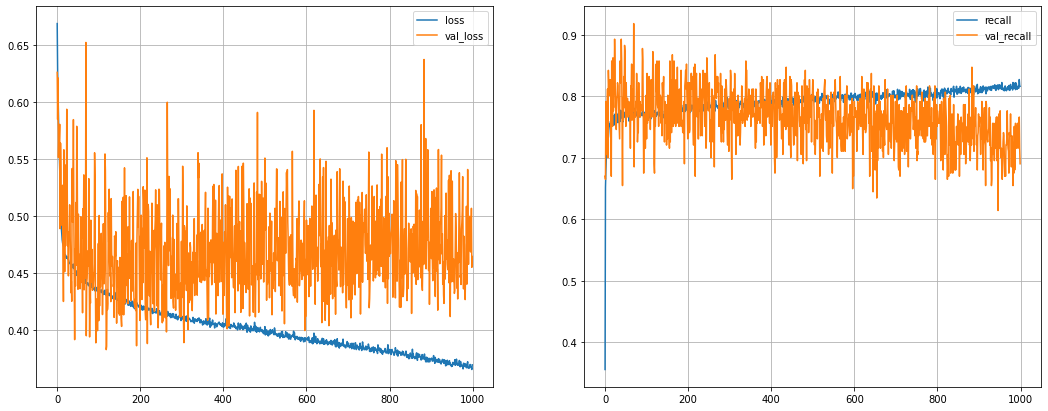

In [47]:
# Plot training results
plot_history(history)

In [48]:
pipe_ann2[-1].evaluate(
    pipe_ann2[:-1].transform(X_test), y_test, 
    return_dict=True, verbose=0)

{'loss': 0.5032983422279358,
 'accuracy': 0.7760000228881836,
 'recall': 0.6323529481887817}

In [179]:
eval_metric(pipe_ann2, X_train, y_train, X_test, y_test)

282/282 [==============================] - 0s 1ms/step
TEST
[[647 149]
 [ 75 129]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       796
           1       0.46      0.63      0.54       204

    accuracy                           0.78      1000
   macro avg       0.68      0.72      0.69      1000
weighted avg       0.81      0.78      0.79      1000

-------------------------------------------------------
TRAIN
[[6142 1025]
 [ 385 1448]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      7167
           1       0.59      0.79      0.67      1833

    accuracy                           0.84      9000
   macro avg       0.76      0.82      0.78      9000
weighted avg       0.87      0.84      0.85      9000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [50]:
print("Model Defined Shape: ", X_train_enc.shape[1])                  # Input Layer Shape
print("Model Defined Unit : ", X_train_enc.shape[1]*1.5, " -> ", 32)  # Input Layer Units

# way-1
def build_classifier_model(
        input_dim: int = X_train_enc.shape[1],
        units:int      = 32,
) -> tf.keras.models.Model:    
    import tensorflow as tf    
    
    model = Sequential()
    model.add(Dense(units = units, activation = 'relu', input_shape=(input_dim, ) )) # input_dim = input_dim
    model.add(Dense(units = 16, activation = 'relu'))
    model.add(Dense(units = 8, activation = 'relu'))
    model.add(Dense(units = 1, activation = 'sigmoid'))
    
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.005), 
                  loss = 'binary_crossentropy', 
                  metrics = ['accuracy', 'Recall'], 
                  # weighted_metrics=['Recall']
                  )
    return model

Model Defined Shape:  13
Model Defined Unit :  19.5  ->  32


In [51]:
tf.keras.backend.clear_session()

tf.random.set_seed(seed)
np.random.seed(seed)

model = build_classifier_model_ann()
# model.optimizer.learning_rate = 5e-3
display(model.summary())

pipe_ann3 = Pipeline([
    ("transform", column_trans),
    ("ann", model)
])
pipe_ann3

Model: "classifier_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


None

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Geography', 'Gender'])])),
                ('ann',
                 <keras.engine.functional.Functional object at 0x7f18ff2e1fa0>)])

In [52]:
%%time
history = pipe_ann3.fit(X = X_train, y = y_train, ann__validation_split = 0.1, #validation_data = val_ds,
                    ann__batch_size = 64, ann__epochs = 1000, ann__verbose = 0, ann__class_weight=class_weights)

CPU times: user 9min 54s, sys: 49.4 s, total: 10min 43s
Wall time: 7min 56s


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [53]:
history_df = pd.DataFrame(history[-1].history.history)
history_df.index += 1
history_df.tail()

,loss,accuracy,recall,val_loss,val_accuracy,val_recall
996,0.326701,0.848395,0.854523,0.502359,0.802222,0.725888
997,0.325920,0.845062,0.857579,0.500715,0.791111,0.756345
998,0.323857,0.848765,0.861247,0.508301,0.798889,0.756345
999,0.319569,0.848518,0.863081,0.472643,0.817778,0.675127
1000,0.322756,0.849136,0.861858,0.493438,0.797778,0.700508


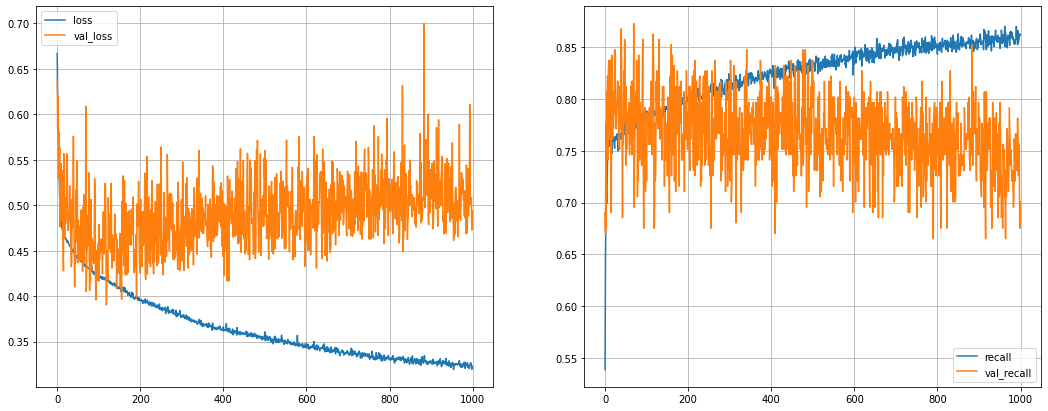

In [54]:
# Plot training results
plot_history(history)

In [55]:
pipe_ann3[-1].evaluate(
    pipe_ann3[:-1].transform(X_test), y_test, 
    return_dict=True, verbose=0)

{'loss': 0.5869230031967163,
 'accuracy': 0.7760000228881836,
 'recall': 0.6176470518112183}

In [180]:
eval_metric(pipe_ann3, X_train, y_train, X_test, y_test)

282/282 [==============================] - 0s 2ms/step
TEST
[[650 146]
 [ 78 126]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       796
           1       0.46      0.62      0.53       204

    accuracy                           0.78      1000
   macro avg       0.68      0.72      0.69      1000
weighted avg       0.81      0.78      0.79      1000

-------------------------------------------------------
TRAIN
[[6188  979]
 [ 322 1511]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7167
           1       0.61      0.82      0.70      1833

    accuracy                           0.86      9000
   macro avg       0.78      0.84      0.80      9000
weighted avg       0.88      0.86      0.86      9000



### Add Dropout Layer

In [57]:
print("Model Defined Shape: ", X_train_enc.shape[1])                  # Input Layer Shape
print("Model Defined Unit : ", X_train_enc.shape[1]*1.5, " -> ", 32)  # Input Layer Units

# way-1
def build_classifier_model(
        input_dim: int = X_train_enc.shape[1],
        units:int      = 32,
) -> tf.keras.models.Model:    
    import tensorflow as tf    
    
    model = Sequential()
    model.add(Dense(units = units, activation = 'relu', input_shape=(input_dim, ) )) # input_dim = input_dim
    model.add(Dropout(0.1))
    model.add(Dense(units = 16, activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(units = 8, activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(units = 1, activation = 'sigmoid'))
    
    model.compile(optimizer = "adam", 
                  loss = 'binary_crossentropy', 
                  metrics = ['accuracy', 'Recall'], 
                  # weighted_metrics=['Recall']
                  )
    return model

Model Defined Shape:  13
Model Defined Unit :  19.5  ->  32


In [58]:
tf.keras.backend.clear_session()

tf.random.set_seed(seed)
np.random.seed(seed)

model = build_classifier_model()
display(model.summary())

pipe_ann4 = Pipeline([
    ("transform", column_trans),
    ("ann", model)
])
pipe_ann4

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9

None

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Geography', 'Gender'])])),
                ('ann',
                 <keras.engine.sequential.Sequential object at 0x7f18ff348e80>)])

In [59]:
%%time
history = pipe_ann4.fit(X = X_train, y = y_train, ann__validation_split = 0.1, #validation_data = val_ds,
                    ann__batch_size = 64, ann__epochs = 1000, ann__verbose = 0, ann__class_weight=class_weights)

CPU times: user 10min 9s, sys: 49 s, total: 10min 58s
Wall time: 8min 22s


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [60]:
history_df = pd.DataFrame(history[-1].history.history)
history_df.index += 1
history_df.tail()

,loss,accuracy,recall,val_loss,val_accuracy,val_recall
996,0.397658,0.822839,0.817848,0.475664,0.787778,0.776650
997,0.393861,0.819012,0.809291,0.484388,0.795556,0.807107
998,0.389222,0.820000,0.824572,0.471192,0.796667,0.791878
999,0.393914,0.821235,0.813570,0.480586,0.792222,0.796954
1000,0.389354,0.827037,0.816015,0.478159,0.787778,0.786802


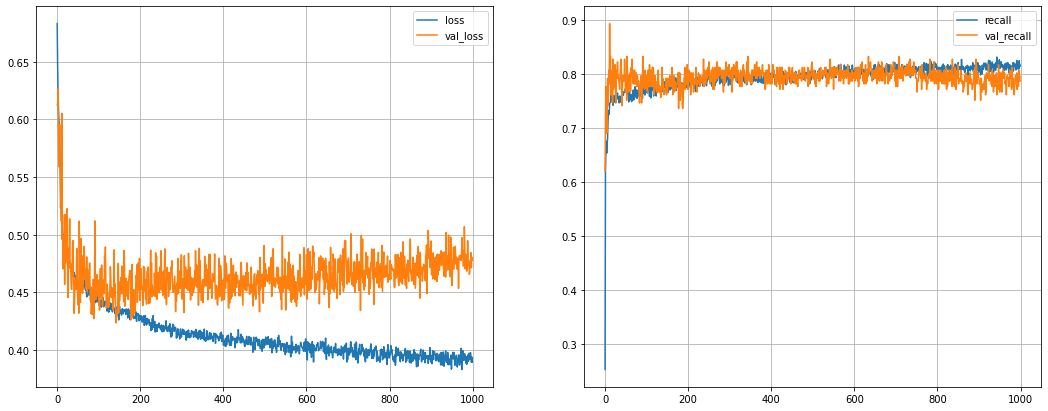

In [61]:
# Plot training results
plot_history(history)

In [62]:
pipe_ann4[-1].evaluate(
    pipe_ann4[:-1].transform(X_test), y_test, 
    return_dict=True, verbose=0)

{'loss': 0.4895476698875427,
 'accuracy': 0.7639999985694885,
 'recall': 0.6813725233078003}

In [181]:
eval_metric(pipe_ann4, X_train, y_train, X_test, y_test)

282/282 [==============================] - 0s 1ms/step
TEST
[[625 171]
 [ 65 139]]
              precision    recall  f1-score   support

           0       0.91      0.79      0.84       796
           1       0.45      0.68      0.54       204

    accuracy                           0.76      1000
   macro avg       0.68      0.73      0.69      1000
weighted avg       0.81      0.76      0.78      1000

-------------------------------------------------------
TRAIN
[[5990 1177]
 [ 281 1552]]
              precision    recall  f1-score   support

           0       0.96      0.84      0.89      7167
           1       0.57      0.85      0.68      1833

    accuracy                           0.84      9000
   macro avg       0.76      0.84      0.79      9000
weighted avg       0.88      0.84      0.85      9000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [64]:
from tensorflow.keras.callbacks import EarlyStopping

In [65]:
tf.keras.backend.clear_session()

tf.random.set_seed(seed)
np.random.seed(seed)

model = build_classifier_model()
display(model.summary())

pipe_ann5 = Pipeline([
    ("transform", column_trans),
    ("ann", model)
])
pipe_ann5

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9

None

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Geography', 'Gender'])])),
                ('ann',
                 <keras.engine.sequential.Sequential object at 0x7f18fc625820>)])

In [66]:
early_stop = EarlyStopping(monitor='val_loss', mode="min",
                           verbose = 1, patience = 15, restore_best_weights = True)
#The patience is often set somewhere between 10 and 100 (10 or 25 is more common), 
#but it really depends on your dataset and network.

In [71]:
%%time
history = pipe_ann5.fit(X = X_train, y = y_train, ann__validation_split = 0.1, #validation_data = val_ds,
                    ann__batch_size = 64, ann__epochs = 1000, ann__verbose = 0, ann__callbacks=[early_stop], ann__class_weight=class_weights)

Restoring model weights from the end of the best epoch: 53.
Epoch 68: early stopping
CPU times: user 44.9 s, sys: 3.17 s, total: 48.1 s
Wall time: 40.4 s


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [72]:
history_df = pd.DataFrame(history[-1].history.history)
history_df.index += 1
history_df.tail(16)

,loss,accuracy,recall,val_loss,val_accuracy,val_recall
53,0.473488,0.772346,0.759780,0.426072,0.792222,0.725888
54,0.467851,0.790988,0.748778,0.512607,0.733333,0.807107
55,0.464275,0.791235,0.757946,0.465081,0.774444,0.807107
56,0.466495,0.790000,0.764670,0.457895,0.776667,0.786802
57,0.463426,0.790741,0.755501,0.437999,0.788889,0.746193
58,0.469785,0.787284,0.747555,0.481905,0.770000,0.802030
59,0.468987,0.788519,0.751834,0.455639,0.786667,0.751269
60,0.465527,0.791235,0.753056,0.476949,0.771111,0.786802
61,0.465163,0.788025,0.752445,0.502919,0.750000,0.817259
62,0.463424,0.793210,0.756724,0.450731,0.793333,0.771574


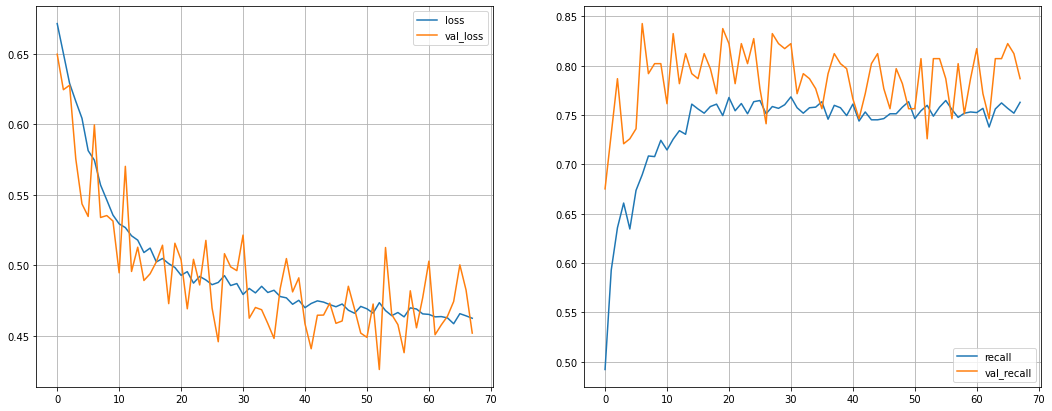

In [73]:
# Plot training results
plot_history(history)

In [74]:
pipe_ann5[-1].evaluate(
    pipe_ann5[:-1].transform(X_test), y_test, 
    return_dict=True, verbose=0)

{'loss': 0.45095983147621155,
 'accuracy': 0.7829999923706055,
 'recall': 0.6519607901573181}

In [182]:
eval_metric(pipe_ann5, X_train, y_train, X_test, y_test)

282/282 [==============================] - 1s 2ms/step
TEST
[[650 146]
 [ 71 133]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       796
           1       0.48      0.65      0.55       204

    accuracy                           0.78      1000
   macro avg       0.69      0.73      0.70      1000
weighted avg       0.81      0.78      0.79      1000

-------------------------------------------------------
TRAIN
[[6058 1109]
 [ 519 1314]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      7167
           1       0.54      0.72      0.62      1833

    accuracy                           0.82      9000
   macro avg       0.73      0.78      0.75      9000
weighted avg       0.84      0.82      0.83      9000



#### Monitor the "val_recall" as metric

In [76]:
tf.keras.backend.clear_session()

tf.random.set_seed(seed)
np.random.seed(seed)

model = build_classifier_model()
display(model.summary())

pipe_ann6 = Pipeline([
    ("transform", column_trans),
    ("ann", model)
])
pipe_ann6

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9

None

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Geography', 'Gender'])])),
                ('ann',
                 <keras.engine.sequential.Sequential object at 0x7f1901539f40>)])

In [77]:
early_stop = EarlyStopping(monitor='val_recall', mode="max",
                           verbose = 1, patience = 15, restore_best_weights = True)

In [78]:
%%time
history = pipe_ann6.fit(X = X_train, y = y_train, ann__validation_split = 0.1, #validation_data = val_ds,
                    ann__batch_size = 64, ann__epochs = 1000, ann__verbose = 0, ann__callbacks=[early_stop], ann__class_weight=class_weights)

Restoring model weights from the end of the best epoch: 12.
Epoch 27: early stopping
CPU times: user 18.1 s, sys: 1.43 s, total: 19.5 s
Wall time: 14.7 s


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [79]:
history_df = pd.DataFrame(history[-1].history.history)
history_df.index += 1
history_df.tail(16)

,loss,accuracy,recall,val_loss,val_accuracy,val_recall
12,0.549294,0.737284,0.707824,0.609840,0.675556,0.852792
13,0.543711,0.742469,0.713325,0.525036,0.731111,0.761421
14,0.535207,0.746543,0.719438,0.529197,0.725556,0.791878
15,0.529299,0.744938,0.715159,0.495168,0.746667,0.751269
16,0.520162,0.749630,0.735941,0.486866,0.754444,0.746193
17,0.518792,0.759012,0.724939,0.519099,0.725556,0.802030
18,0.514828,0.756296,0.729218,0.535255,0.713333,0.832487
19,0.506576,0.756667,0.735941,0.465703,0.771111,0.741117
20,0.503381,0.769136,0.718826,0.523177,0.732222,0.837563
21,0.499195,0.761975,0.746944,0.486553,0.760000,0.781726


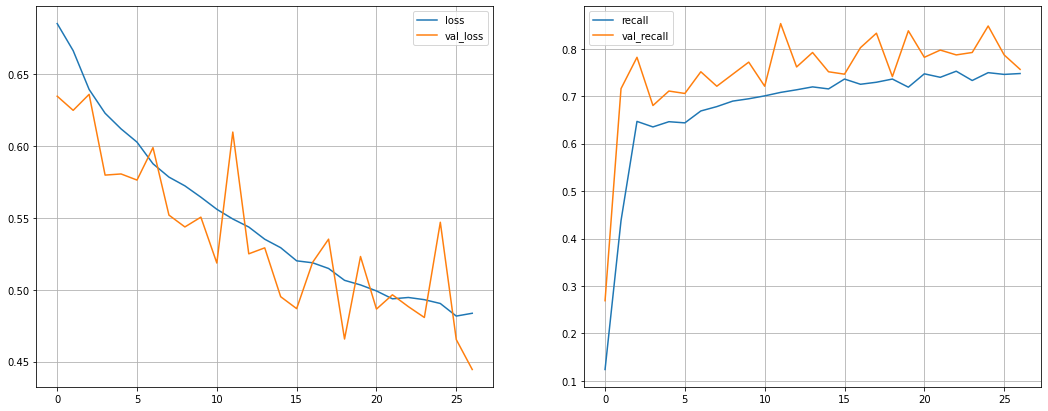

In [80]:
# Plot training results
plot_history(history)

In [81]:
pipe_ann6[-1].evaluate(
    pipe_ann1[:-1].transform(X_test), y_test, 
    return_dict=True, verbose=0)

{'loss': 0.6352118849754333,
 'accuracy': 0.6600000262260437,
 'recall': 0.8088235259056091}

In [183]:
eval_metric(pipe_ann6, X_train, y_train, X_test, y_test)

282/282 [==============================] - 0s 2ms/step
TEST
[[495 301]
 [ 39 165]]
              precision    recall  f1-score   support

           0       0.93      0.62      0.74       796
           1       0.35      0.81      0.49       204

    accuracy                           0.66      1000
   macro avg       0.64      0.72      0.62      1000
weighted avg       0.81      0.66      0.69      1000

-------------------------------------------------------
TRAIN
[[4739 2428]
 [ 336 1497]]
              precision    recall  f1-score   support

           0       0.93      0.66      0.77      7167
           1       0.38      0.82      0.52      1833

    accuracy                           0.69      9000
   macro avg       0.66      0.74      0.65      9000
weighted avg       0.82      0.69      0.72      9000



## Cross Validation

**Keras models** can be used in **scikit-learn** by wrapping them with the **KerasClassifier** or **KerasRegressor** class.

To use these wrappers you must define a function that creates and returns your Keras sequential model, then pass this function to the build_fn argument when constructing the KerasClassifier class.

The constructor for the KerasClassifier class can take default arguments that are passed on to the calls to model.fit(), such as the number of epochs and the batch size.

In [84]:
print("Model Defined Shape: ", X_train_enc.shape[1])                  # Input Layer Shape
print("Model Defined Unit : ", X_train_enc.shape[1]*1.5, " -> ", 32)  # Input Layer Units

# way-2
def build_classifier_model_ann(
        input_dim: int = X_train_enc.shape[1],
        units:int      = 32,
) -> tf.keras.models.Model:
    import tensorflow as tf  
    
    inputs = tf.keras.layers.Input(shape=(input_dim, ) )
    x = tf.keras.layers.Dense(units, activation='relu')(inputs)
    x = tf.keras.layers.Dense(16, activation=tf.nn.relu)(x)
    x = tf.keras.layers.Dense(8, activation=tf.nn.relu)(x)   
    outputs  = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="classifier_model") 

    precision_at_recall = tf.keras.metrics.PrecisionAtRecall(recall=0.8)

    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), 
                  loss = tf.keras.losses.BinaryCrossentropy(), 
                  metrics = ['accuracy', tf.keras.metrics.Recall()], 
                  # weighted_metrics = [tf.keras.metrics.Recall()] 
                  )
    return model

Model Defined Shape:  13
Model Defined Unit :  19.5  ->  32


In [85]:
print("Model Defined Shape: ", X_train_enc.shape[1])                  # Input Layer Shape
print("Model Defined Unit : ", X_train_enc.shape[1]*1.5, " -> ", 32)  # Input Layer Units

# way-2
def build_classifier_model(
        optimizer: tf.keras.optimizers.Optimizer = tf.keras.optimizers.Adam,
        learning_rate: float = 1e-3,
        input_dim: int = X_train_enc.shape[1],
        units:int      = 32,
) -> tf.keras.models.Model:
    import tensorflow as tf    
    
    model = Sequential()
    model.add(Dense(units = units, activation = 'relu', input_shape=(input_dim, ) )) # input_dim = input_dim
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(units = 16, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(units = 8, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(units = 1, activation = 'sigmoid'))
    
    model.compile(optimizer = optimizer(learning_rate = learning_rate), 
                  loss = 'binary_crossentropy', 
                  metrics = ['Recall'], 
                  # weighted_metrics=['Recall']
                  )
    return model

Model Defined Shape:  13
Model Defined Unit :  19.5  ->  32


In [86]:
tf.keras.backend.clear_session()
build_classifier_model().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 16)                0

In [87]:
from sklearn.utils import class_weight

class_weights = dict(
    zip(np.unique(y_train),
        class_weight.compute_class_weight(
            class_weight = 'balanced',
            classes = np.unique(y_train), 
            y = y_train)
))
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [88]:
%%time
from sklearn.model_selection import cross_validate, cross_val_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
tf.keras.backend.clear_session()

tf.random.set_seed(seed)
np.random.seed(seed)

early_stop = EarlyStopping(monitor='val_loss', mode="min",
                           verbose = 1, patience = 15, restore_best_weights = True)

classifier = KerasClassifier(
    build_fn  = build_classifier_model, optimizer = tf.keras.optimizers.Adam, learning_rate = 1e-3,
    validation_split=.1, batch_size=32, epochs=50, verbose=1, callbacks = [early_stop], class_weight = class_weights,
)
pipe_ann = Pipeline([
    ("transform", column_trans),
    ("ann", classifier)
])
scores = cross_validate(
    estimator= pipe_ann, 
    X = X_train, y = y_train, 
    scoring = ['precision','recall', 'f1', 'accuracy'], # scoring,
    return_train_score=True,
    error_score="raise",
    verbose=0,
    n_jobs=-1,
    cv=4,
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns').iloc[:, 2:]
df_scores.agg(["mean", "std"]).T

CPU times: user 940 ms, sys: 335 ms, total: 1.27 s
Wall time: 3min 48s


,mean,std
test_precision,0.510104,0.026925
train_precision,0.525792,0.023846
test_recall,0.723740,0.047064
train_recall,0.749753,0.034036
test_f1,0.597200,0.015635
train_f1,0.617257,0.008659
test_accuracy,0.801444,0.010961
train_accuracy,0.810370,0.015076


In [90]:
%%time
from sklearn.model_selection import cross_validate, cross_val_score
from scikeras.wrappers import KerasClassifier, KerasRegressor
tf.keras.backend.clear_session()

tf.random.set_seed(seed)
np.random.seed(seed)

classifier = KerasClassifier(
    model  = build_classifier_model, model__optimizer = tf.keras.optimizers.Adam, model__learning_rate = 1e-3,
    validation_split=.1, batch_size=32, epochs=50, verbose=1, callbacks = [early_stop], class_weight = class_weights,
)
pipe_ann = Pipeline([
    ("transform", column_trans),
    ("ann", classifier)
])
scores = cross_validate(
    estimator= pipe_ann, 
    X = X_train, y = y_train, 
    scoring = ['precision','recall', 'f1', 'accuracy'], # scoring,
    return_train_score=True,
    error_score="raise",
    verbose=0,
    n_jobs=-1,
    cv=4,
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns').iloc[:, 2:]
df_scores.agg(["mean", "std"]).T

CPU times: user 1.21 s, sys: 298 ms, total: 1.5 s
Wall time: 5min 4s


,mean,std
test_precision,0.510390,0.013003
train_precision,0.530520,0.009339
test_recall,0.730510,0.017930
train_recall,0.759590,0.011375
test_f1,0.600877,0.013773
train_f1,0.624629,0.005717
test_accuracy,0.802333,0.007658
train_accuracy,0.814037,0.005040


## GridSearchCV

In [91]:
from sklearn.utils import class_weight

class_weights = dict(
    zip(np.unique(y_train),
        class_weight.compute_class_weight(
            class_weight = 'balanced',
            classes = np.unique(y_train), 
            y = y_train)
))
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [92]:
# from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
tf.keras.backend.clear_session()

tf.random.set_seed(seed)
np.random.seed(seed)

early_stop = EarlyStopping(monitor='val_loss', mode="min",
                           verbose = 1, patience = 10, restore_best_weights = True)

classifier = KerasClassifier(
    build_fn  = build_classifier_model, 
    validation_split=.1, epochs=50, verbose=1, callbacks = [early_stop], class_weight = class_weights,
)
pipe_ann = Pipeline([
    ("transform", column_trans),
    ("ann", classifier)
])
parameters = {
    'ann__batch_size': [16, 32, 64, 128], 
    'ann__optimizer': [Adam, RMSprop, Adadelta, Nadam],
    'ann__learning_rate': [1e-3, 3e-3, 5e-3]}

grid_model = GridSearchCV(
    estimator = pipe_ann,
    param_grid = parameters,
    scoring = 'neg_log_loss',
    verbose = 0,
    n_jobs = -1,
    cv = 3,
)

In [93]:
%%time
grid_model.fit(X_train, y_train)

Epoch 1/50
127/127 [==============================] - 3s 8ms/step - loss: 0.6322 - recall: 0.6400 - val_loss: 0.5713 - val_recall: 0.5736
Epoch 2/50
127/127 [==============================] - 1s 6ms/step - loss: 0.5472 - recall: 0.6803 - val_loss: 0.4247 - val_recall: 0.5228
Epoch 3/50
127/127 [==============================] - 1s 6ms/step - loss: 0.5180 - recall: 0.7103 - val_loss: 0.4551 - val_recall: 0.7005
Epoch 4/50
127/127 [==============================] - 1s 6ms/step - loss: 0.5074 - recall: 0.7298 - val_loss: 0.4986 - val_recall: 0.8223
Epoch 5/50
127/127 [==============================] - 1s 6ms/step - loss: 0.5045 - recall: 0.7256 - val_loss: 0.4656 - val_recall: 0.7817
Epoch 6/50
127/127 [==============================] - 1s 6ms/step - loss: 0.5009 - recall: 0.7243 - val_loss: 0.4262 - val_recall: 0.7208
Epoch 7/50
127/127 [==============================] - 1s 6ms/step - loss: 0.4985 - recall: 0.7182 - val_loss: 0.4820 - val_recall: 0.7766
Epoch 8/50
127/127 [==============

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Geography',
                                                                          'Gender'])])),
                                       ('ann',
                                        <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f18ff99bf70>)]),
             n_jobs=-1,
             param_grid={'ann__batch_size': [16, 32, 64, 128],
                         'ann__learning_rate': [0.001, 0.003, 0.005],
                         'ann__optimizer': [<

In [94]:
grid_model.best_score_

-0.38498291425701203

In [95]:
grid_model.best_params_

{'ann__batch_size': 64,
 'ann__learning_rate': 0.005,
 'ann__optimizer': keras.optimizers.optimizer_experimental.rmsprop.RMSprop}

In [96]:
# grid_model.cv_results_

grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
33,-0.384983,0.013854,1,"{'ann__batch_size': 64, 'ann__learning_rate': ..."
44,-0.398446,0.011406,2,"{'ann__batch_size': 128, 'ann__learning_rate':..."
47,-0.400497,0.010318,3,"{'ann__batch_size': 128, 'ann__learning_rate':..."
45,-0.400507,0.012644,4,"{'ann__batch_size': 128, 'ann__learning_rate':..."
28,-0.402021,0.009576,5,"{'ann__batch_size': 64, 'ann__learning_rate': ..."
21,-0.406289,0.006975,6,"{'ann__batch_size': 32, 'ann__learning_rate': ..."
41,-0.406572,0.007677,7,"{'ann__batch_size': 128, 'ann__learning_rate':..."
40,-0.408915,0.018266,8,"{'ann__batch_size': 128, 'ann__learning_rate':..."
16,-0.410201,0.016287,9,"{'ann__batch_size': 32, 'ann__learning_rate': ..."
9,-0.412389,0.007394,10,"{'ann__batch_size': 16, 'ann__learning_rate': ..."


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In [186]:
eval_metric(grid_model, X_train, y_train, X_test, y_test, pipe=False)

282/282 [==============================] - 1s 4ms/step
TEST
[[712  84]
 [112  92]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       796
           1       0.52      0.45      0.48       204

    accuracy                           0.80      1000
   macro avg       0.69      0.67      0.68      1000
weighted avg       0.79      0.80      0.80      1000

-------------------------------------------------------
TRAIN
[[6544  623]
 [ 900  933]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      7167
           1       0.60      0.51      0.55      1833

    accuracy                           0.83      9000
   macro avg       0.74      0.71      0.72      9000
weighted avg       0.82      0.83      0.83      9000



#### ROC (Receiver Operating Characteristic Curve) and AUC (Area Under Curve)

32/32 [==============================] - 0s 3ms/step


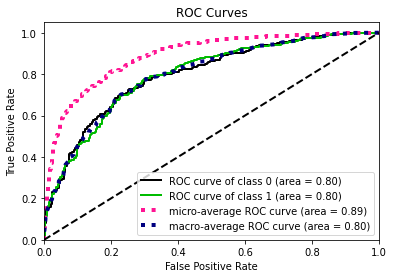

In [102]:
# !pip install scikit-plot -Uq
import scikitplot as skplt

y_pred_proba = grid_model.predict_proba(X_test)

# skplt.metrics.plot_roc(y_test, np.hstack([(1-y_pred_proba), y_pred_proba]))
skplt.metrics.plot_roc(y_test, y_pred_proba)
plt.show()

32/32 [==============================] - 0s 2ms/step


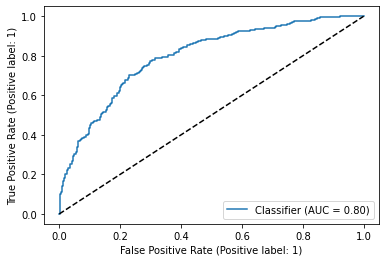

In [103]:
from sklearn.metrics import RocCurveDisplay

y_pred_proba = grid_model.predict_proba(X_test)

RocCurveDisplay.from_predictions(y_test, y_pred_proba[:, 1])
plt.plot([0, 1],[0, 1], 'k--')
plt.show();

In [104]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.7968519065917825

32/32 [==============================] - 0s 2ms/step


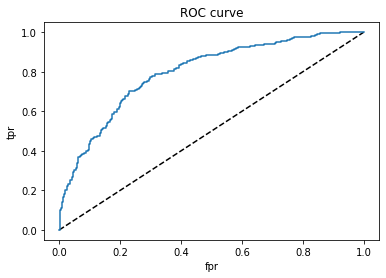

In [105]:
y_pred_proba = grid_model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.plot([0, 1],[0, 1], 'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

#### Precision Recall Curve

32/32 [==============================] - 0s 2ms/step


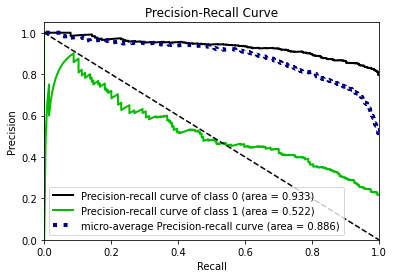

In [106]:
# !pip install scikit-plot -Uq
import scikitplot as skplt

y_pred_proba = grid_model.predict_proba(X_test)

# skplt.metrics.plot_precision_recall(y_test, np.hstack([(1-y_pred_proba), y_pred_proba]))
skplt.metrics.plot_precision_recall(y_test, y_pred_proba)
plt.plot([0, 1],[1, 0], 'k--')
plt.show()

In [107]:
average_precision_score(y_test, y_pred_proba[:, 1])

0.522289085810691

32/32 [==============================] - 0s 2ms/step


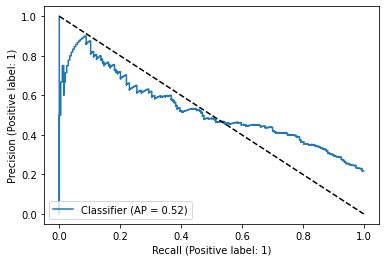

In [108]:
from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = grid_model.predict_proba(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba[:, 1])
plt.plot([0, 1],[1, 0], 'k--')
plt.show();

# Final Model and Model Deployment

In [109]:
X.shape, y.shape

((10000, 10), (10000,))

In [110]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

cat = X.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)

In [111]:
X_enc = column_trans.fit_transform(X)

In [112]:
from sklearn.utils import class_weight

class_weights = dict(
    zip(np.unique(y_train),
        class_weight.compute_class_weight(
            class_weight = 'balanced',
            classes = np.unique(y_train), 
            y = y_train)
))
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

## Final Model

{'ann__batch_size': 64,
 'ann__learning_rate': 0.005,
 'ann__optimizer': keras.optimizers.optimizer_experimental.rmsprop.RMSprop}

In [144]:
print("Model Defined Shape: ", X_enc.shape[1])                  # Input Layer Shape
print("Model Defined Unit : ", X_enc.shape[1]*1.5, " -> ", 32)  # Input Layer Units

# way-1
def build_classifier_model_ann(
        optimizer: tf.keras.optimizers.Optimizer = tf.keras.optimizers.RMSprop,
        learning_rate: float = 5e-3,
        input_dim: int = X_enc.shape[1],
        units:int      = 32,
) -> tf.keras.models.Model:
    import tensorflow as tf  
    
    inputs = tf.keras.layers.Input(shape=(input_dim, ) )
    x = tf.keras.layers.Dense(units, activation='relu')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.1)(x) 
    x = tf.keras.layers.Dense(16, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.1)(x) 
    x = tf.keras.layers.Dense(8, activation=tf.nn.relu)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.1)(x)     
    outputs = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="classifier_model") 

    precision_at_recall = tf.keras.metrics.PrecisionAtRecall(recall=0.8)
    
    model.compile(optimizer = optimizer(learning_rate = learning_rate), 
                  loss = tf.keras.losses.BinaryCrossentropy(), 
                  metrics = [tf.keras.metrics.Recall()], 
                  # weighted_metrics = [tf.keras.metrics.Recall()] 
                  )
    return model

Model Defined Shape:  13
Model Defined Unit :  19.5  ->  32


In [161]:
tf.keras.backend.clear_session()

model = build_classifier_model_ann()
display(model.summary())

pipe_ann = Pipeline([
    ("transform", column_trans),
    ("ann", model)
])
pipe_ann

Model: "classifier_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 32)                448       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                  

None

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Geography', 'Gender'])])),
                ('ann',
                 <keras.engine.functional.Functional object at 0x7f18fe032280>)])

In [162]:
early_stop = EarlyStopping(monitor='val_loss', mode="min",
                           verbose = 1, patience = 15, restore_best_weights = True)

In [163]:
%%time
history = pipe_ann.fit(X = X_train, y = y_train, ann__validation_split = 0.1, #validation_data = val_ds,
                    ann__batch_size = 64, ann__epochs = 1000, ann__verbose = 0, ann__callbacks=[early_stop], ann__class_weight=class_weights)

Restoring model weights from the end of the best epoch: 6.
Epoch 21: early stopping
CPU times: user 20 s, sys: 1.33 s, total: 21.3 s
Wall time: 16 s


In [164]:
history_df = pd.DataFrame(history[-1].history.history)
history_df.index += 1
history_df.tail(16)

,loss,recall,val_loss,val_recall
6,0.501728,0.735941,0.416001,0.664975
7,0.498042,0.727995,0.487721,0.791878
8,0.488329,0.729218,0.479114,0.807107
9,0.485058,0.740831,0.416069,0.715736
10,0.491036,0.731663,0.511496,0.857868
11,0.485188,0.737775,0.489526,0.817259
12,0.485027,0.731663,0.495232,0.827411
13,0.486383,0.753667,0.448527,0.751269
14,0.481462,0.732274,0.524128,0.842640
15,0.483707,0.736553,0.425871,0.781726


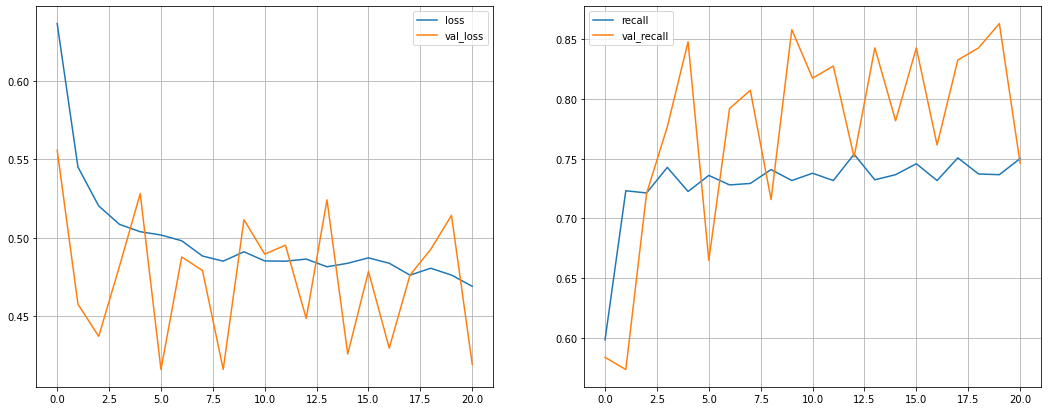

In [165]:
# Plot training results
plot_history(history)

In [166]:
pipe_ann[-1].evaluate(
    pipe_ann[:-1].transform(X), y, 
    return_dict=True, verbose=0)

{'loss': 0.407619833946228, 'recall': 0.6460481286048889}

In [187]:
eval_metric(pipe_ann, X, y, X, y)

313/313 [==============================] - 1s 2ms/step
TEST
[[6938 1025]
 [ 721 1316]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      7963
           1       0.56      0.65      0.60      2037

    accuracy                           0.83     10000
   macro avg       0.73      0.76      0.74     10000
weighted avg       0.84      0.83      0.83     10000

-------------------------------------------------------
TRAIN
[[6938 1025]
 [ 721 1316]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      7963
           1       0.56      0.65      0.60      2037

    accuracy                           0.83     10000
   macro avg       0.73      0.76      0.74     10000
weighted avg       0.84      0.83      0.83     10000



In [188]:
y_pred_proba = pipe_ann[-1].predict(pipe_ann[:-1].transform(X))

print("roc_auc_score          : ", roc_auc_score(y, y_pred_proba))
print("average_precision_score: ", average_precision_score(y, y_pred_proba))

313/313 [==============================] - 1s 2ms/step
roc_auc_score          :  0.8572405722070862
average_precision_score:  0.6828468093448413


## Saving Final Model and Scaler

In [153]:
import pickle

pickle.dump(column_trans, open("transform_customer_churn.pkl", 'wb'))

In [154]:
model.save('model_customer_churn.h5')

## Loading Model and Scaler

In [155]:
from tensorflow.keras.models import load_model

In [156]:
transform_churn = pickle.load(open("transform_customer_churn.pkl", "rb"))
model_churn = load_model('model_customer_churn.h5')

## Prediction

In [157]:
df['Exited'].head(1)

0    1
Name: Exited, dtype: int64

In [158]:
mean_human = df.drop('Exited', axis = 1).iloc[0:1, :]
display(mean_human)
mean_human = transform_churn.transform(mean_human)

result = (model_churn.predict(mean_human)>0.5).astype("uint8")
result

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.0,1,1,1,101348.88


1/1 [==============================] - 0s 97ms/step


array([[1]], dtype=uint8)

In [159]:
mean_human = df.mode()
display(mean_human)

result = (model_churn.predict(transform_churn.transform(mean_human)) > 0.5).astype("uint8")
result

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,850,France,Male,37,2,0.0,1,1,1,24924.92,0


1/1 [==============================] - 0s 19ms/step


array([[0]], dtype=uint8)

In [160]:
mean_human = pd.DataFrame(df.mean()).T.join( df.select_dtypes('O').mode() )
display(mean_human)

result = (model_churn.predict(transform_churn.transform(mean_human)) > 0.5).astype("uint8")
result

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography,Gender
0,650.5288,38.9218,5.0128,76485.889288,1.5302,0.7055,0.5151,100090.239881,0.2037,France,Male


1/1 [==============================] - 0s 17ms/step


array([[0]], dtype=uint8)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___